<h1>Шаг 1: Выгрузка данных<h1>

In [124]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
games_data = pd.read_csv('/Users/DanilBee/Desktop/Yandex_projects/Games/games.csv')

In [127]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<h2>Вывод:</h2>
<br>
<br>
<p>Загрузили данные , сразу видно ,что есть множество проблем:
    <ul>
        <li>Название колонок с большой буквы</li>
        <li>Есть столбцы с множеством пропусков:нужно понять столбцы ,где можно заполнить данные и где нету логической замены</li>
        <li>Столбец с именем невозможно заполнить какой-то логикой ,но таких всего 2 , значит можно дропнуть такие строки без потери репрезентативности</li>
        <li>Остальные столбцы нужно смотреть , ведь одна и та же игра может быть на разных платформах и в соотвествии с этим можно попробовать выполнить заполнение пропусков</li>
        <li>Проверить на дупликаты и дропнуть их</li>
        <li>Поменять форматы данных , на те с которыми можно работать</li>

<h1> Шаг 2: Предобработка данных </h1>

In [128]:
#changing the name of columns

games_data.columns = ['name','platform','year_of_release','genre','na_sales','eu_sales',
                      'jp_sales','other_sales','critic_score','user_score','rating']
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [131]:
#dropping the nans in these columns : year_of_release has some but not much  so we can live with that
#and name has only 2 missing values
games_data.dropna(subset=['year_of_release'], inplace = True)
games_data.dropna(subset=['name'], inplace = True)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [132]:
#tbd stands fro to be determined , so it basically means there is no vallue , we can replace this with nans
games_data['user_score'].replace('tbd',np.nan, inplace=True)
#after doing that we can make the column to numeric value so we can with user_score in the future analysis
pd.to_numeric(games_data['user_score'], errors='ignore')
games_data['user_score'] = games_data['user_score'].astype(float)
games_data['year_of_release'] = games_data['year_of_release'].astype(int)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [133]:
#dropping duplicates
games_data = games_data.drop_duplicates()

<h2>Вывод</h2>
<br>
<br>
<p>
    Провели небольшую предобработку данных:
    <ul>
        <li>Заменили названия столбцов на строчные</li>
        <li>Избавились от пары строк с пропавшим именем</li>
        <li>Избавились от строк в годе выпуска,их было тоже немного(269) ,поэтому в репрезентативности данных не теряем, была идея восстановить данные на основе той же самой игры на другой платформе ,но код затратный по времени , и восстанавливает около 100 (что может быть не верно,ибо релиз той же игры на разных платформах может быть в разное время)</li>
        <li>Была идея заполнить рейтинг по той же логике ,что и год выпуска , на основе других платформ взять среднее по оценкам и заполнить ими ,но код затратный на время и может также не отражать суть , ибо адаптирование игры на разные платформы или новые фичи в новой платформе могут поднять значительно рейтинг , а мы этого не учли.Также результат кода был достаточно мал ,поэтому просто будет жить с nan'ами)</li>
        <li>Также заменили tbdв user_score на NaN ,так как tbd(to be determined) означает ,что нету еще значения , что совпадает по смыслу с NaN'ами и может работать как и с ними,так как все равно нету логической замены на что-то иное</li>
        <li>В user_score значение столбца поменяли на численное для будущего анализа и работы с данными</li>
        <li>Из измены типов данных можно сделать такую операцию только с year_of_release. Продажи идут в миллионах и округлять потеряем репрезентативность и будет максимально не правильно, либо умножать и превращать в int не вижу смысла</li>
        <li>В конце всей работы вызвали метод drop_duplicates() и убрали дупликаты из таблицы</li>
    </ul>

<h1>Шаг 3: Исследовательский анализ данных</h1>

In [134]:
games_data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
        ... 
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, Length: 37, dtype: int64

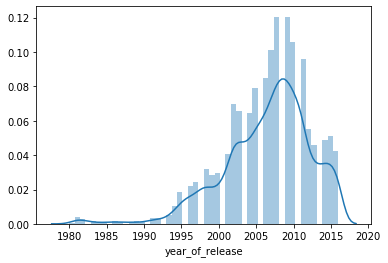

In [135]:
ax = sns.distplot(games_data['year_of_release'])

Можно выделить актуальный период по выпуску игр: с 2000 года 

In [136]:
games_data['platform'].value_counts()
#according on results I would choose the values from XOne without looking on the dates

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
        ... 
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, Length: 31, dtype: int64

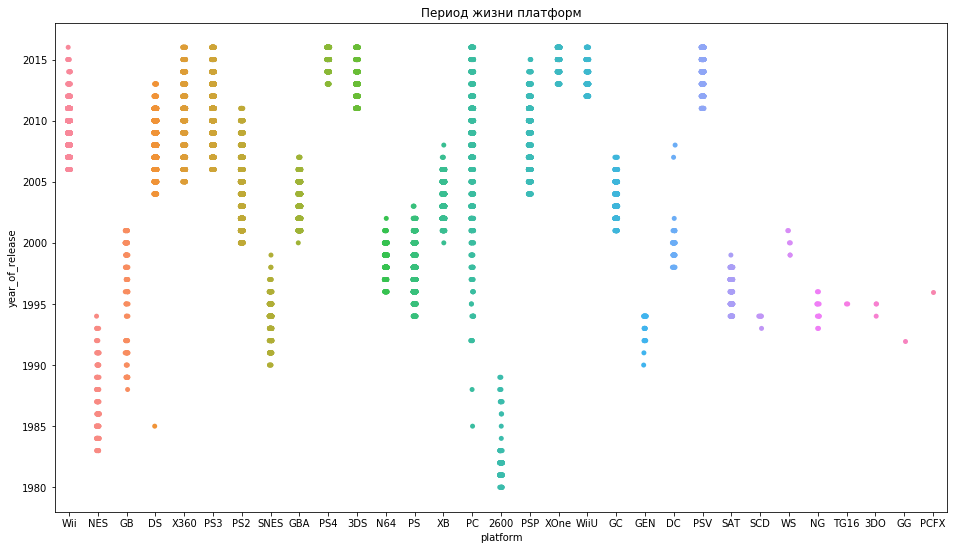

In [137]:
plt.figure(figsize=(16,9))
ax = sns.stripplot(x='platform',y='year_of_release',data=games_data, jitter = 0.05).set_title('Период жизни платформ');

Характерный срок "жизни" каждой консоли можно заметить - составляет в среднем примерно 10 лет. 
<br>
<br>
Есть небольшие исключения из этого , например - ПК , после его появления он только набирал свою популярность ,но это легко объясняется тем,что под именем этой платформы происходят модификации постоянно и сама по себе платформа ,скорей всего, никогда не устареет.
<br>
<br>
Остальные платформы - ограничены заводскими установками , поэтому выходят новые платформы от той же фирмы , и как мы видим примерно с периодичностью в 5 лет , и после этого каждая из платформ живет еще примерно 5 лет.
<br>
<br>
Также можем наблюдать остальные не такие удачные платформы , которые существовали не так долго. И Были затменены огромным выбором в свой промежуток времени и не смогли быть конкуретноспособными
<br>
<br>
Можно дать медаль ветерана платформе 2600, так как для своего времени он показал неплохие результаты и дал настрой , и мотивацию двигать данное направление вперед

<strong>На основе данных 2 таблиц можно сделать вывод об актуальном периоде:</strong>
<br>
<br>
По количеству выпуску игр по годам дает нам акутальный период с 2000 года
<br>
По актуальности приставок актуальный период с 2005-2006 года
<br>
<br>
Так как нам нужно основываясь на <i>актуальном периоде</i> сделать выводы на 2017 год, нужно брать данные основываясь на акутальность годов ,но что более важно - платформ ! Поэтому актуальным периодом будет <strong>2006-2016</strong> , с которым продолжим работу 

In [138]:
#choosing the games that were up to an actual date that we chose 
games_upto_date = games_data[games_data['year_of_release'] > 2005]

In [139]:
#choosing profitable platforms
games_upto_date['platform'].value_counts()

DS      1979
PS3     1306
Wii     1286
X360    1214
PSP     1083
        ... 
WiiU     147
XB        66
GBA       45
GC        44
DC         2
Name: platform, Length: 16, dtype: int64

In [140]:
#Getting rid of low popularity in the relevant period
games_upto_date = games_upto_date[(games_upto_date['platform'] != 'GBA') & (games_upto_date['platform'] !='GC') & (games_upto_date['platform'] !='DC') & (games_upto_date['platform'] !='XB')]

In [141]:
#calcilating the sum of all kinds os sales into new columns
games_upto_date['sum_sales'] = games_upto_date['na_sales'] + games_upto_date['eu_sales'] + games_upto_date['jp_sales'] + games_upto_date['other_sales']

In [142]:
#making a pivot table with the sum for each platform by year and displaying all the rows
sales_platform_by_year = games_upto_date.pivot_table(index = ['platform','year_of_release'], values = 'sum_sales', aggfunc = 'sum')
pd.set_option('display.max_rows', None)
sales_platform_by_year

sum_sales
platform year_of_release           
3DS      2011                 63.20
         2012                 51.36
         2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14
DS       2006                119.81
         2007                146.94
         2008                145.31
         2009                119.54
         2010                 85.02
         2011                 26.18
         2012                 11.01
         2013                  1.54
PC       2006                  2.85
         2007                  9.28
         2008                 12.42
         2009                 16.91
         2010                 24.28
         2011                 35.03
         2012                 23.22
         2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25
PS2      2006                103.42
         2007                 75.99
         2008                 53.90
         2009                 26.40
         2010                  5.64
         2011                  0.45
PS3      2006                 20.96
         2007                 73.19
         2008                118.52
         2009                130.93
         2010                142.17
         2011                156.78
         2012                107.36
         2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25
PSP      2006                 55.32
         2007                 46.93
         2008                 34.55
         2009                 37.78
         2010                 35.04
         2011                 17.82
         2012                  7.69
         2013                  3.14
         2014                  0.24
         2015                  0.12
PSV      2011                  4.63
         2012                 16.19
         2013                 10.59
         2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2006                137.15
         2007                152.77
         2008                171.32
         2009                206.97
         2010                127.95
         2011                 59.65
         2012                 21.71
         2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2012                 17.56
         2013                 21.65
         2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2006                 51.62
         2007                 95.41
         2008                135.26
         2009                120.29
         2010                170.03
         2011                143.84
         2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

После просмотра выручки за года, можно сделать вывод PS4 Самая прибыльная к 2015-2016 году платформа с результатом в 188. млн, за ней по прибыльности XOne 86.29 млн, также 3DS не сильно отстает на 2015-2016 42.92 млн, хотя объем выручки падает достаточно сильно. Далее PS3(20.42), X360(13.48), PC(13.77), WiiU(20.95), PSV(10.50) все они не имели запредельно высоких показателей ,но показывают отсносительно своих продаж неплохие результаты - с учетом того ,что в 2015-2016 году у всех неважные показатели по продажам и у более старых платформ виден тренд ,что с 2011 года у всех них падают продажи. Скорей всего , связано с анонсами ближайшего выхода следующих поколений и с их выходом окончательно упали. Видно особенно хорошо это по Wii ,только с выходом новой консоли у них лучше не стало
<br>
<br>
Смотрел продажи за 2015-2016год ,ибо возможно данные за 2016 год еще не успели все поступить по продажам

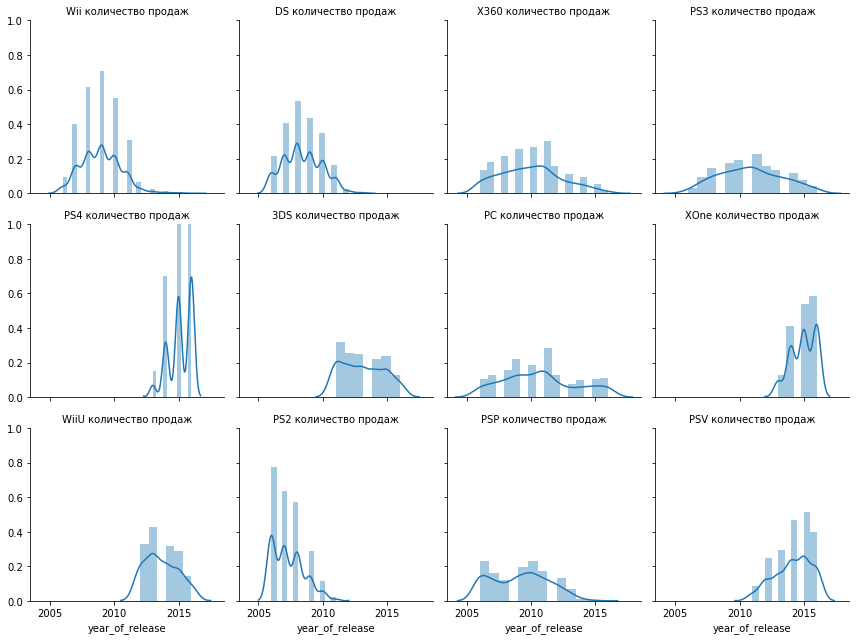

In [143]:
pd.set_option('display.max_rows', 10)
#distribution quantity of sales by year
g = sns.FacetGrid(games_upto_date, col = 'platform',col_wrap = 4);
g = g.map(sns.distplot, 'year_of_release').set_titles('{col_name} количество продаж');
g.set(ylim=(0, 1));
#g.set(ylabel='относительная шкала кол-ва продаж')

<h3>Графики продаж игр консолей по годам</h3>
<ul>
    <li>По графику <strong>Wii</strong> видно ,что продажи приходились на 2006-2012 года, пик был в 2008 , после этого продажи пошли на спад. Хотя консоль и была успешной в свои года и продавала большое количество ,но акутальность свою потеряла</li>
    <li>У <strong>DS</strong> похожая ситуация ,но график более сконцетрирован между 2005 и 2010 , пик приходился на 2007, после 2010 продажи пошли на резкий спад и не представляет актуальности на 2017</li>
    <li>У <strong>X360</strong> продажи идут неплохие и по 2016 год ,но идут на спад ,после пика  в 2011-2012 годах , но можно расчитывать на какие-то продажи по данной консоли</li>
    <li><strong>PS3</strong> ситуация такая же как и у X360 ,только после пика в 2011-2012 годах , спад не такой резкий как у X360,также здесь можно вполне расчитывать на продажи по данной консоли</li>
    <li><strong>PS4</strong> Имеет три пика примерно в 2013 году , в 2015 году и в 2016 году особенно , платформа новая , и продаж по ней не так много ,относительно ТОП 5 за данный период времени,Но она как видно по графику только набирает популярность и из в года в год показывает только лучше и лучше результаты . Однозначно PS4 Очень много обещающая консоль</li>
    <li><strong>3DS</strong> также относительно новая модель ,которая показывает средние результаты , без какого-либо определенного пика (кроме небольшого на старте продаж),но продажи идут на убыль,также можно считать эту консоль акутальной и можно расчитывать на какие-то продажи в 2017</li>
    <li><strong>PC</strong> как мы увидили также из прошлых графиков - платформа ,которая никогда не умрет и можно назвать ее даже "вечной" , хотя дела у нее ближе к 2007 стали хуже, видимо связано это с выходом нового вида консолей ,которые перетянули на себя часть одеяла также и из под PC,но на PC однозначно всегда можно расчитывать на продажи ,может не такие большие , но данная платформа вечная и проверенная временем</li>
    <li><strong>XOne</strong> также консоль нового поколения ,которая только вышла и набирает только популярность и показывает все лучше и лучше результаты , видно сразу ,что уступает PS4 ,но также является многообещающей платформой ,на которую можно сделать ставку</li>
    <li><strong>WiiU</strong> Также как и 3DS показывает средние результаты для относительно новой консоли ,но популярянось их обоих падает достаточно быстро , продажи какие-то будут ,но колосальными их точно не назовешь </li>
    <li><strong>PS2</strong> Однозначно устарелая консоль ,которая была хороша в 2005 - 2010 года ,для своего времени показывала весьма неплохие результаты ,но на смену ей пришла PS3 ,расчитывать на продажи по ней точно не стит</li>
    <li><strong>PSP</strong> также весьма неплохая консоль в плане показателей ,которая в своей время продала большое количество игр ,но ближе к 2015 продажи совсем упали</li>
    <li>Падение на PSP можно связать с выходом ее замены - <strong>PSV</strong> ,которая перехватила все продажи и также на ряду с PS4 и XOne показывает весьма перспективные показатели по прадажам И также из года в год показывает все лучше и лучше результаты</li>

<h3>Актуальность консолей:</h3>
<br>
<strong>Самыми актуальными будем считать эти консоли ,которые будут многообещающими на 2017:</strong>
<ol>
    <li>PS4</li>
    <li>XOne</li>
    <li>3DS</li>
</ol>
<strong>Более-менее актуальными будут:</strong>
<ol>
    <li>PS3</li>
    <li>X360</li>
    <li>WiiU</li>
    <li>PC</li>
    <li>PSV</li>
</ol>

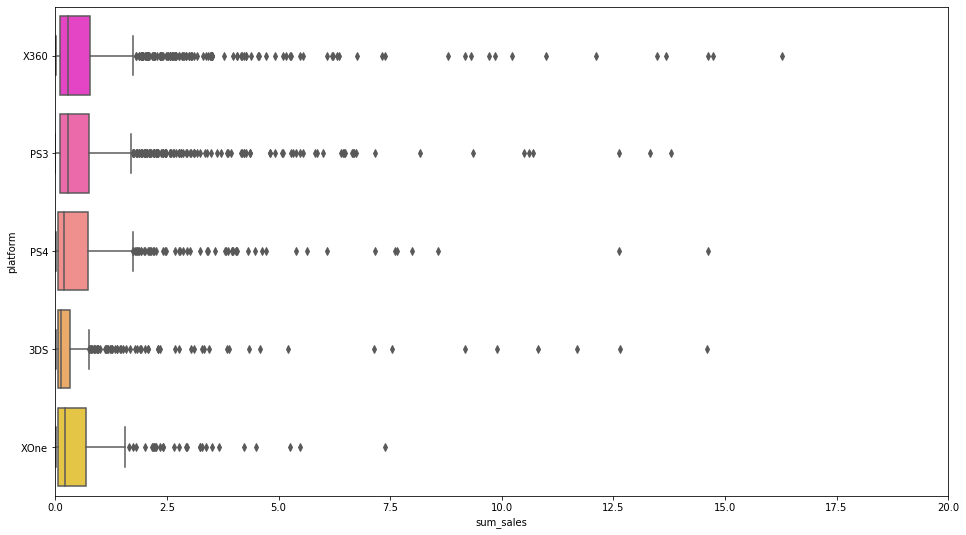

In [144]:
top_platform = games_upto_date[(games_upto_date['platform'] == 'PS4') | (games_upto_date['platform'] == 'XOne') | \
                               (games_upto_date['platform'] == 'PS3') | (games_upto_date['platform'] == 'X360') | \
                               (games_upto_date['platform'] == '3DS')]

plt.figure(figsize=(16,9))
ax = sns.boxplot(data=top_platform,x='sum_sales',y='platform',palette='spring')
ax.set(xlim=(0,20));

In [145]:
print('Средняя сумма продажи на платформе PS4: {}$'.format(int((games_upto_date[games_upto_date['platform'] == 'PS4']['sum_sales'].mean())*1000000)))
print('Средняя сумма продажи на платформе PS3: {}$'.format(int((games_upto_date[games_upto_date['platform'] == 'PS3']['sum_sales'].mean())*1000000)))
print('Средняя сумма продажи на платформе XOne: {}$'.format(int((games_upto_date[games_upto_date['platform'] == 'XOne']['sum_sales'].mean())*1000000)))
print('Средняя сумма продажи на платформе X360: {}$'.format(int((games_upto_date[games_upto_date['platform'] == 'X360']['sum_sales'].mean())*1000000)))
print('Средняя сумма продажи на платформе 3DS: {}$'.format(int((games_upto_date[games_upto_date['platform'] == '3DS']['sum_sales'].mean())*1000000)))

Средняя сумма продажи на платформе PS4: 801377$
Средняя сумма продажи на платформе PS3: 713124$
Средняя сумма продажи на платформе XOne: 645020$
Средняя сумма продажи на платформе X360: 784999$
Средняя сумма продажи на платформе 3DS: 503535$


Глобальные продажи у более старых поколений(PS3 & X360: очень схожие результаты) показывают лучше результаты,чем новые (PS4 & XOne: очень схожие результаты), что объясняется разницей выпущенных игр ,так как эти консоли существовали дольше и история у них больше также из-за этого у большего количества людей есть старая платформа , новые же только набирают популярность и разработчики только переходят и адаптируются под новое поколение, не так много людей еще перешли на новые консоли , поэтому эти консоли из года в год показывают лучше результаты : больше пользователей,больше разработчиков переходят на проекты для новый консолей. Также у 3DS значительно отличаются показатели от всех остальных платформ , это связано с тем ,что остальные это "статичные" платформы , в то время как 3DS переносная и в связи с этим у нее железо слабее, и разработчики не могут выпускать те же игры ,что и на остальные платформы ,поэтому для них адаптируются версии с остальных Nintendo ,либо приходится создавать эксклюзивные проекты. Схожесть результатов одного покаления среди Microsoft и Sony заключается в том , что основная масса игр у них схожа , отличие в основном в нескольких эксклюзивах, Интерфейс, и эстетическое удовольсвтие от определенной платформы. Сравнивая значения средних , можно сделать вывод , что есть выбросы ,которые искажают среднее. У PS4 их особенно много , ведь в случае с Xbox сравнением , то там примерно пропорционально ,ведь как была небольшая разница с медианой у них ,что X360 чуть больше , так и со средним . У 3DS выбросов тоже не мало , ведь очень сильно отличается от медианы. Выбросами в случае игр можно предположить наличие каких-то очень успешных эксклюзивов ,которые возможно были на старте или в целом проект ,который имел очень хорошую маркетинговую кампанию ,что игру ждал весь мир и показатели были выше всех ожидаемых

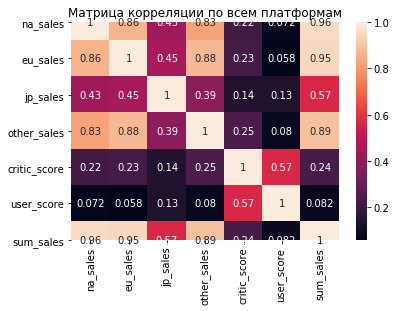

In [146]:
#correlation of user_score, critic_score to sales

#plt.figure(figsize=(13,7));
matrix = games_upto_date.drop('year_of_release',axis=1)
sns.heatmap(matrix.corr(), annot=True).set_title('Матрица корреляции по всем платформам');

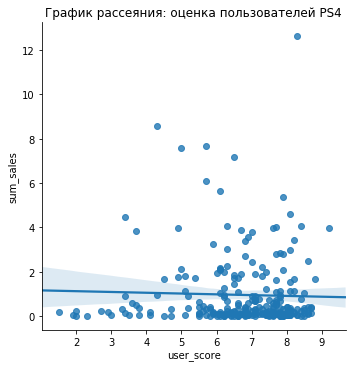

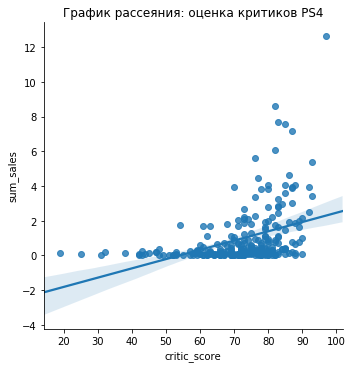

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
na_sales,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
sum_sales,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


In [147]:
#ps4 correlation
ps4_data = matrix[(matrix['platform'] == 'PS4')]
g = sns.lmplot(x='user_score',y='sum_sales',data=ps4_data)
g = plt.gca()
g.set_title('График рассеяния: оценка пользователей PS4')
plt.show()
g = sns.lmplot(x='critic_score',y='sum_sales',data=ps4_data)
g = plt.gca()
g.set_title('График рассеяния: оценка критиков PS4')
plt.show()
ps4_data.corr()

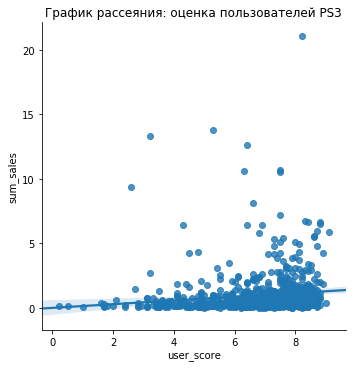

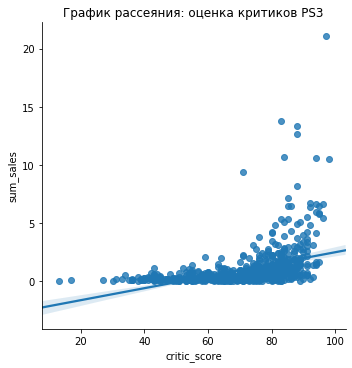

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
na_sales,1.000000,0.813041,0.344322,0.872154,0.454413,0.137699,0.936839
eu_sales,0.813041,1.000000,0.374296,0.974571,0.382536,0.087823,0.958120
jp_sales,0.344322,0.374296,1.000000,0.378520,0.202937,0.171022,0.458046
other_sales,0.872154,0.974571,0.378520,1.000000,0.394883,0.111490,0.976537
critic_score,0.454413,0.382536,0.202937,0.394883,1.000000,0.631154,0.432759
user_score,0.137699,0.087823,0.171022,0.111490,0.631154,1.000000,0.128416
sum_sales,0.936839,0.958120,0.458046,0.976537,0.432759,0.128416,1.000000


In [148]:
#ps3 correlation
ps3_data = matrix[matrix['platform'] == 'PS3']
g = sns.lmplot(x='user_score',y='sum_sales',data=ps3_data)
g = plt.gca()
g.set_title('График рассеяния: оценка пользователей PS3')
plt.show()
g = sns.lmplot(x='critic_score',y='sum_sales',data=ps3_data)
g = plt.gca()
g.set_title('График рассеяния: оценка критиков PS3')
plt.show()
ps3_data.corr()

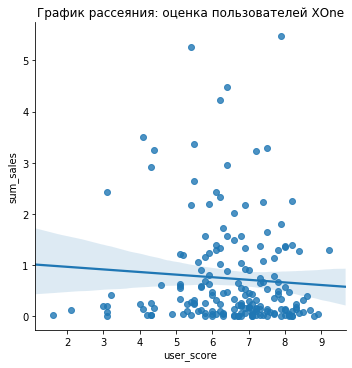

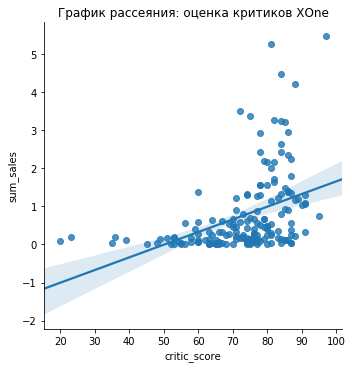

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
na_sales,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critic_score,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
sum_sales,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


In [149]:
#xone correlation
xone = matrix[matrix['platform'] == 'XOne']
g = sns.lmplot(x='user_score',y='sum_sales',data=xone)
g = plt.gca()
g.set_title('График рассеяния: оценка пользователей XOne')
plt.show()
g = sns.lmplot(x='critic_score',y='sum_sales',data=xone)
g = plt.gca()
g.set_title('График рассеяния: оценка критиков XOne')
plt.show()
xone.corr()

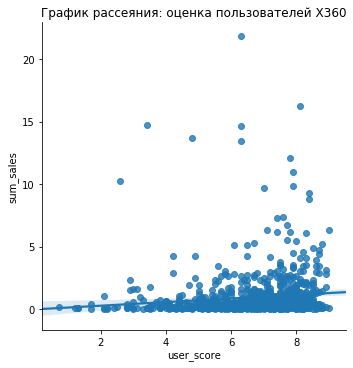

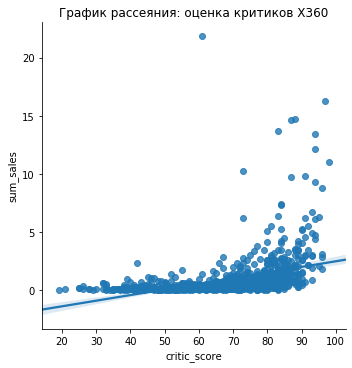

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
na_sales,1.000000,0.856172,0.491359,0.964694,0.378718,0.107974,0.984518
eu_sales,0.856172,1.000000,0.467601,0.948362,0.391669,0.112854,0.933034
jp_sales,0.491359,0.467601,1.000000,0.507169,0.284636,0.183120,0.511935
other_sales,0.964694,0.948362,0.507169,1.000000,0.405777,0.124506,0.992427
critic_score,0.378718,0.391669,0.284636,0.405777,1.000000,0.622629,0.396307
user_score,0.107974,0.112854,0.183120,0.124506,0.622629,1.000000,0.115762
sum_sales,0.984518,0.933034,0.511935,0.992427,0.396307,0.115762,1.000000


In [150]:
#x360 correlation
x360 = matrix[matrix['platform'] == 'X360']
g = sns.lmplot(x='user_score',y='sum_sales',data=x360)
g = plt.gca()
g.set_title('График рассеяния: оценка пользователей X360')
plt.show()
g = sns.lmplot(x='critic_score',y='sum_sales',data=x360)
g = plt.gca()
g.set_title('График рассеяния: оценка критиков X360')
plt.show()
x360.corr()

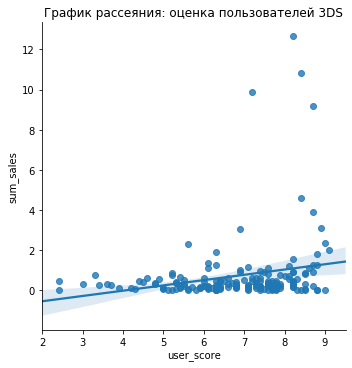

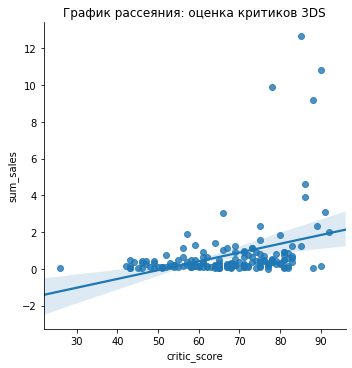

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
na_sales,1.000000,0.943670,0.664840,0.991024,0.335420,0.200297,0.950142
eu_sales,0.943670,1.000000,0.686445,0.971201,0.309868,0.165741,0.951947
jp_sales,0.664840,0.686445,1.000000,0.672817,0.348216,0.272660,0.852413
other_sales,0.991024,0.971201,0.672817,1.000000,0.322502,0.184406,0.958187
critic_score,0.335420,0.309868,0.348216,0.322502,1.000000,0.745222,0.348740
user_score,0.200297,0.165741,0.272660,0.184406,0.745222,1.000000,0.222078
sum_sales,0.950142,0.951947,0.852413,0.958187,0.348740,0.222078,1.000000


In [151]:
#3ds correlation
ds3 = matrix[matrix['platform'] == '3DS']
g = sns.lmplot(x='user_score',y='sum_sales',data=ds3)
g = plt.gca()
g.set_title('График рассеяния: оценка пользователей 3DS')
plt.show()
g = sns.lmplot(x='critic_score',y='sum_sales',data=ds3)
g = plt.gca()
g.set_title('График рассеяния: оценка критиков 3DS')
plt.show()
ds3.corr()

<h3>Выводы о корреляции:</h3>
<br>
<br>
Исходят из матриц корреляции и графиков рассеяния , можно сделать выводы ,что <strong>есть зависимость между продажами и оценкой критиков</strong> у всех платформ , хотя и не такая уж и большая зависимость. Однако <strong>зависимость между оценкой пользователя продажами не такая однозначная</strong> , зависимость <strong>отсутствует</strong> у <i>PS4 и XOne</i> даже без намека на ее существование . У <i>X360 и PS3</i> <strong>есть намеки на ее существование</strong> ,хотя достаточно и малые . У <i>3DS</i> же зависимость оценки пользователей оказывает относительно остальных <strong>достаточное влияние</strong> ,чтобы его не игнорировать, видимо у данной платформы пользователи при выборе и покупке игры смотрят не только на оценки критиков , но и уделяют внимание на оценки пользователей , ибо игры не имеют как такого авторитета и приходится ссылаться на то и другое в некоторых случаях

In [152]:
genre_sales = games_upto_date.pivot_table(index='genre',values=['na_sales','eu_sales','jp_sales','other_sales','sum_sales'],aggfunc='sum')
pd.set_option('display.max_rows', 12)
genre_sales.sort_values(by='sum_sales', ascending=False)

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
genre,,,,,
Action,348.44,101.96,522.96,133.19,1106.55
Sports,250.23,48.87,392.28,96.52,787.90
Shooter,238.58,19.33,372.23,85.64,715.78
Misc,146.45,64.14,283.82,58.35,552.76
Role-Playing,110.52,169.35,199.37,41.73,520.97
Racing,112.35,13.20,129.34,39.35,294.24
Platform,81.04,35.20,132.26,28.63,277.13
Simulation,69.63,23.31,107.40,19.80,220.14
Fighting,42.56,28.52,93.98,22.86,187.92


Видно ,что в топ 4 входят жанры ,которые могут включать себя много под жанров или их комбинацию ,но все они жанры с активным/быстрым геймплеем. В отличии от хвоста ,где расположились более сдержанные жанры - паззлы,стратегии,приключения за исключением драк ,но там не так много популярных игр , а те ,что есть - имеют высокий возрастной рейтинг.То есть внизу списка жанры игр ,которые можно обобщить - "на любителя" в то время , как в топе жанры игр ,которые предпочтут большинство пользователей

<h2>Вывод:</h2>
<br>
В итоге после анализа данных ,получили:
<br>
<br>
<strong>Актуальный период</strong> ,который обосновали на основе выпуска игр по годам ,основная масса продаж игр была с 2000 года . Но также после анализа данных о актуальности платформ ,выяснили ,что в среднем платформа живет 10 лет , кроме нескольких исключений( которые жили слишком мало - были затменены обилием конкурентов на рынке . А есть одна платформа ,которая живет уже очень долго - PC ,но в отличие от остальных это не один бренд с конкретными "мозгами", а множество разных с возможностью кастомизировать ,поэтому актуальность не исчезает данной платформы) Также посмотрели актуальность продаж консолей  и на основе всех этих данных выделили акутальный период - с 2005 года ,который затрагивает цикл каждой из актуальных консолей для анализа.
<br>
<br>

Среди самых <strong>перспективных консолей</strong> на 2017 года выделили : PS4, XOne, 3DS .У первых двух лучшие показатели за последние 2 года,которые растут из года в год ,что обещает многообещающие продажи и в 2017 году. Но также хорошие продажи показывают X360 и PS3 на 2015-2016 год,хоть они и падают из года в год ,но огромное количество пользователей ,оставляет их все еще акутальными.
<br>
<br>
<strong>Средняя сумма продаж</strong> у консолей таких как PS3 и X360 более репрезентативна, так как из-за большого количества данных менее чувствительная к выбросам и показывают примерно одинаковый результат , но PS3 (713124 USD) уступает X360 (784999 USD) по этому значению почти на 75000 USD, что делает X360 более успешной и перспективной консолью на те времена . Однако дело поменялось с PS4 и XOne,где PS4 (801377) очень сильно оторвался по данным показателям от XOne (645020 USD),что делает PS4 более перспективным на современный период , и самой перспективной платформой на 2017 год. У 3DS средняя продажа (503535 USD) горазда ниже всех остальных ,что делает ее менее перспективной на общей картине , но в ее случае также как и с PS4, и XOne данные достаточно свежие и можно примерно понимать какая в среднем выручка будет с проекта на 2017 год
<br>

<br>
После построения и <strong>анализирования корреляции</strong> , пришли к интересным выводам , что не все очевидные параметры могут нести меняющий фактор. Так например оценка пользователей , которая может показаться ,что имеет отношение к сумме продажам, не имеет никакой силы в сумме продаж ,может единцы смотрят на оценку пользователей ,прежде тем как купить ,но это случается очень редко как видим из исследования ,однако у 3DS все-таки добротная часть пользователей как видим смотрит на оценку пользователей и имеет вес в конечной сумме продаж ,видимо пользователи там самые аккуратные и проверяют что покупают. Также оценка критиков везде играет неплохую роль в конечной сумме продаж , что понятно ведь оценка критиков выставляется еще до релиза самой игры , в то время как пользователи не могут этого сделать заранее , по очевидным причинам, а большая часть покупок обычно бывает во время релиза и в ближайшие дни ,что еще раз показывает ,что роль критиков действительно играет роль в продажах ,в то время как пользователи за такой короткий срок мало кто сможет оценить и сформировать оценку
<br>
<br>
<strong>Оценка топ жанров</strong> показывает ,что основная масса пользователей любят игры "драйвовые",которые активные и более-менее основаны на моторику , в то время как внизу списка стоят игры ,которые шаговые и заставляют пользователя думать в игре. Однако также там видим и драки ,на данный момент в голове гиоптеза ,что это ,скорей всего, связано с возрастным рейтингом ESRB

<h1>Шаг 4: составление портрета пользователя каждого региона</h1>

In [153]:
#created data based only on na sales
na_user_data = games_upto_date.drop(['eu_sales','jp_sales','other_sales','sum_sales'], axis=1)

In [154]:
#created data based only on eu sales
eu_user_data = games_upto_date.drop(['na_sales','jp_sales','other_sales','sum_sales'], axis=1)

In [155]:
#created data based only on jp sales
jp_user_data = games_upto_date.drop(['na_sales','eu_sales','other_sales','sum_sales'], axis=1)

,platform,na_sales
10,X360,588.84
8,Wii,486.87
4,PS3,390.13
1,DS,323.99
3,PS2,114.89
5,PS4,108.74
11,XOne,93.12
0,3DS,82.65
6,PSP,80.54
2,PC,44.45


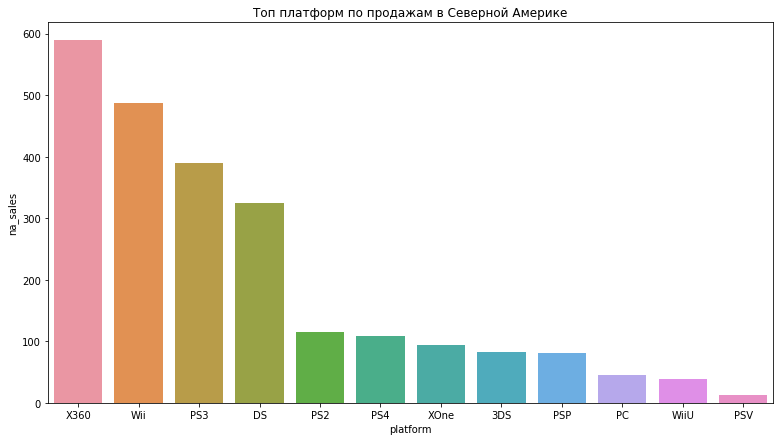

In [156]:
plt.figure(figsize=(13,7))
na_pltf_top = na_user_data.groupby('platform')['na_sales'].sum()
na_pltf_top = na_pltf_top.reset_index(level='platform')
na_pltf_top.sort_values(by='na_sales',ascending=False,inplace=True)
sns.barplot(x='platform',y='na_sales', data = na_pltf_top).set_title('Топ платформ по продажам в Северной Америке');
na_pltf_top

В Северной Америке, как и в остальных регионах , стоит ожидать ,что более старые поколения консолей будут лидировать над современной версией. Так тут лидировал x360 ,над PS3. Также была очень популярна Wii даже популярней ,чем PS3. Также PS2 показывает удивительно очень хорошие результаты , которые по 2016 год обгоняют сумму продаж PS4. XOne здесь не так сильно взлюбили как X360

,platform,eu_sales
4,PS3,327.21
10,X360,267.89
8,Wii,258.32
1,DS,142.99
5,PS4,141.09
2,PC,100.32
0,3DS,61.27
6,PSP,54.21
11,XOne,51.59
3,PS2,46.28


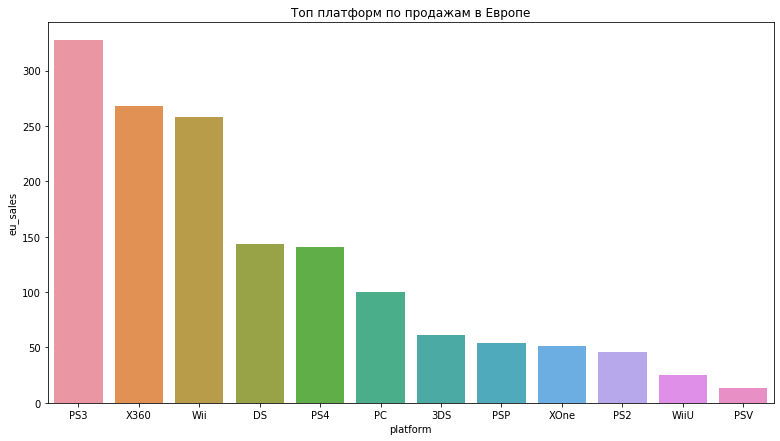

In [157]:
plt.figure(figsize=(13,7))
eu_pltf_top = eu_user_data.groupby('platform')['eu_sales'].sum()
eu_pltf_top = eu_pltf_top.reset_index(level='platform')
eu_pltf_top.sort_values(by='eu_sales',ascending=False,inplace=True)
sns.barplot(x='platform',y='eu_sales', data = eu_pltf_top).set_title('Топ платформ по продажам в Европе');
eu_pltf_top

В Европе дела обстаят иначе, здесь лидирует PS3 с очень хорошим отрвым от X360 в 60млн . Также здесь очень популярна Wii . PS4 Здесь горазда популярнее ,чем в Северной Америке и показывает результаты лучше на 40млн. А XOne здесь сверхнепопулярен,даже PC обгоняет его по продажам

,platform,jp_sales
1,DS,141.49
0,3DS,100.62
4,PS3,79.41
6,PSP,70.63
8,Wii,68.28
3,PS2,35.93
7,PSV,21.84
5,PS4,15.96
9,WiiU,13.01
10,X360,12.02


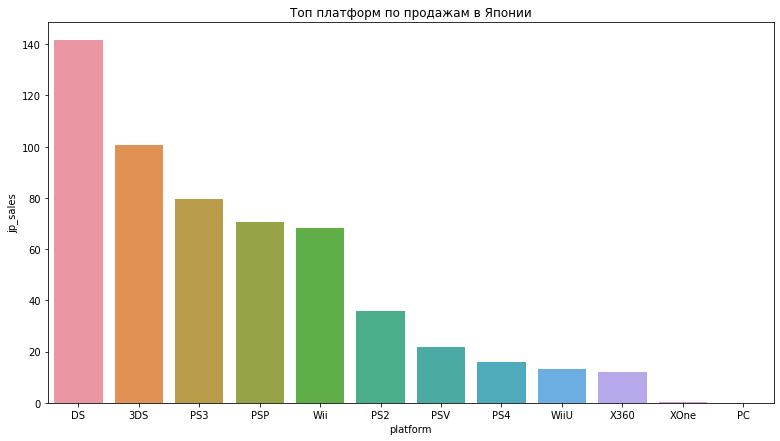

In [158]:
plt.figure(figsize=(13,7))
jp_pltf_top = jp_user_data.groupby('platform')['jp_sales'].sum()
jp_pltf_top = jp_pltf_top.reset_index(level='platform')
jp_pltf_top.sort_values(by='jp_sales',ascending=False,inplace=True)
sns.barplot(x='platform',y='jp_sales', data = jp_pltf_top).set_title('Топ платформ по продажам в Японии');
jp_pltf_top

В Японии же дела совершенно иначе ,здесь очень популярны DS и 3DS , DS здесь просто относительно всех остальных намного лучше показывает , но на смену ему пришла 3DS ,которая также здесь в лидерстве , Платформы версии PS здесь имеют какую-то популярность , PS3 относительно неплохие результаты ,PS2 здесь значительно обгоняет PS4 по продажам . А вот приставки X360 и XOne практически не имеют популярности во все . XOne так однозначно не полюбили в Японии

<h2>Топ 5 платформ по регионам( с поправкой на актуальные платформы ):</h2>
<br>
<ul>
    <li>В Северной Америке топ 5 платформ:
        <ol>
        <li>X360 с суммой продаж: 588.84</li>
        <li>PS3 с суммой продаж: 390.13</li>
        <li>PS4 с суммой продаж: 108.74</li>
        <li>XOne с суммой продаж: 93.12</li>
        <li>3DS с суммой продаж: 82.65</li>
        </ol>
    </li>
    <li>В Европе топ 5 платформ:
        <ol>
            <li>PS3 с суммой продаж: 327.21</li>
            <li>X360 с суммой продаж: 267.89</li>
            <li>PS4 с суммой продаж: 141.09</li>
            <li>3DS с суммой продаж: 61.27</li>
            <li>XOne с суммой продаж: 51.59</li>
        </ol>
    </li>
    <li>В Японии топ 5 платформ:
        <ol>
            <li>3DS с суммой продаж: 100.62</li>
            <li>PS3 с суммой продаж: 79.41</li>
            <li>PS4 с суммой продаж: 15.96</li>
            <li>X360 с суммой продаж: 12.02</li>
            <li>XOne с суммой продаж: 0.34</li>
        </ol>
    </li>
</ul>

,genre,na_sales
0,Action,522.96
10,Sports,392.28
8,Shooter,372.23
3,Misc,283.82
7,Role-Playing,199.37
4,Platform,132.26
6,Racing,129.34
9,Simulation,107.40
2,Fighting,93.98
1,Adventure,60.27


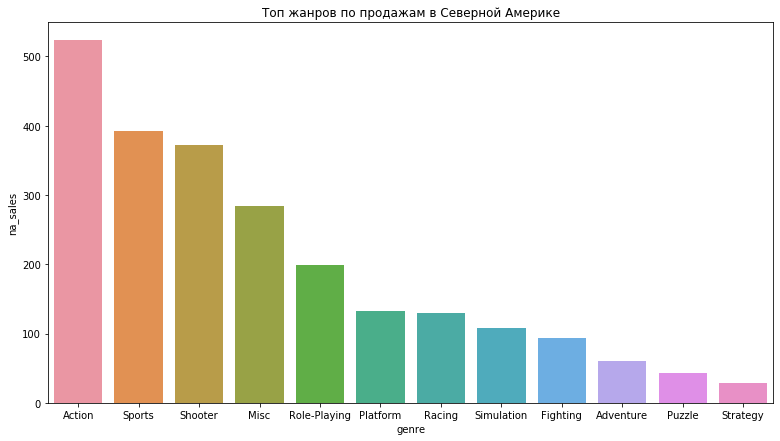

In [166]:
plt.figure(figsize=(13,7))
na_gnr_top = na_user_data.groupby('genre')['na_sales'].sum()
na_gnr_top = na_gnr_top.reset_index(level='genre')
na_gnr_top.sort_values(by='na_sales',ascending=False,inplace=True)
sns.barplot(x='genre',y='na_sales', data = na_gnr_top).set_title('Топ жанров по продажам в Северной Америке');
na_gnr_top

В Северной Америке любят те самые активные игры , нацеленные на моторику и быстрый геймплей , и по мере падения дианмики, падают и объемы продаж ,единсвтенными исключениями являются "гонки" и "драки" , с драками - ясно , рейтинг ESRB ограничивает аудторию , гонки тоже видимо не пользуются популярностью

,genre,eu_sales
0,Action,348.44
10,Sports,250.23
8,Shooter,238.58
3,Misc,146.45
6,Racing,112.35
7,Role-Playing,110.52
4,Platform,81.04
9,Simulation,69.63
2,Fighting,42.56
1,Adventure,37.52


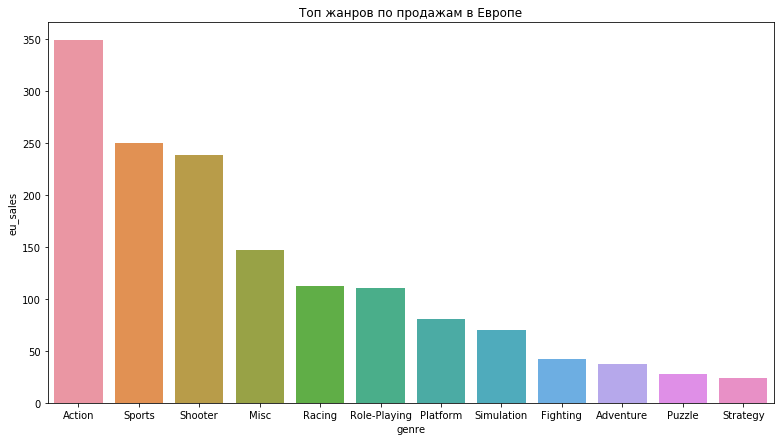

In [160]:
plt.figure(figsize=(13,7))
eu_gnr_top = eu_user_data.groupby('genre')['eu_sales'].sum()
eu_gnr_top = eu_gnr_top.reset_index(level='genre')
eu_gnr_top.sort_values(by='eu_sales',ascending=False,inplace=True)
sns.barplot(x='genre',y='eu_sales', data = eu_gnr_top).set_title('Топ жанров по продажам в Европе');
eu_gnr_top

В Европе почти та же самая ситуация,что и в Северной Америке ,кроме небольшой разницы , что гонки более популярны ,чем ролевые игры

,genre,jp_sales
7,Role-Playing,169.35
0,Action,101.96
3,Misc,64.14
10,Sports,48.87
4,Platform,35.20
1,Adventure,29.49
2,Fighting,28.52
9,Simulation,23.31
8,Shooter,19.33
11,Strategy,13.73


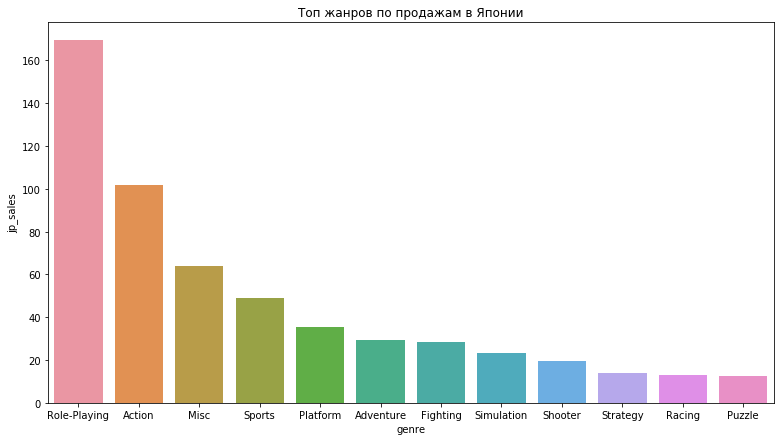

In [161]:
plt.figure(figsize=(13,7))
jp_gnr_top = jp_user_data.groupby('genre')['jp_sales'].sum()
jp_gnr_top = jp_gnr_top.reset_index(level='genre')
jp_gnr_top.sort_values(by='jp_sales',ascending=False,inplace=True)
sns.barplot(x='genre',y='jp_sales', data = jp_gnr_top).set_title('Топ жанров по продажам в Японии');
jp_gnr_top

В Японии же ситуация совершенно другая , у них любимый жанр ролевые игры , экшн также и смешанные популярны. Видимо как раз-таки платформы 3DS и DS больше нацелены на ролевые игры ( по-своему опыту могу предположить ,что видимо влияние Зельды:) ) и захватывают большую часть рынка

<h2>Топ 5 жанров по регионам:</h2>
<br>
<ul>
    <li>В Северной Америке топ 5 жанров:
        <ol>
        <li>Action с суммой продаж: 522.96</li>
        <li>Sports с суммой продаж: 392.28</li>
        <li>Shooter с суммой продаж: 372.23</li>
        <li>Misc с суммой продаж: 283.82</li>
        <li>Role-Playing с суммой продаж: 199.37</li>
        </ol>
    </li>
    <li>В Европе топ 5 жанров:
        <ol>
            <li>Action с суммой продаж: 348.44</li>
            <li>Sports с суммой продаж: 250.23</li>
            <li>Shooter с суммой продаж: 238.58</li>
            <li>Misc с суммой продаж: 146.45</li>
            <li>Racing с суммой продаж: 112.35</li>
        </ol>
    </li>
    <li>В Японии топ 5 жанров:
        <ol>
            <li>Role-Playing с суммой продаж: 169.35</li>
            <li>Action с суммой продаж: 101.96</li>
            <li>Misc с суммой продаж: 64.14</li>
            <li>Sports с суммой продаж: 48.87</li>
            <li>Platform с суммой продаж: 35.20</li>
        </ol>
    </li>
</ul>

Аннотация ESRB:
<br>
<br>
E (eveyone) - содержание вполне подходит для возрастной категории от 6 лет и старше
<br>
M (mature) - Материалы игры не подходят для подростков младше 17 лет
<br>
T (teen) - Игра подходит для лиц от 13 лет и старше
<br>
E10+ (everyone 10 and older) - Для всех от 10 лет и старше
<br>
EC (early childhood) - Игра подходит для детей от 3 лет и старше
<br>
RP(rating panding) - Рейтинг ожидается
<br>
<br>
источник википедия

,rating,na_sales
0,E,788.50
3,M,573.03
5,T,421.46
1,E10+,310.64
2,EC,1.32
4,RP,0.00


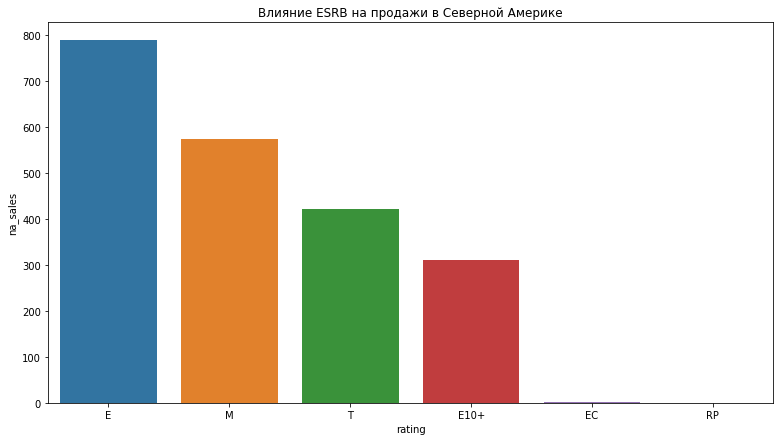

In [162]:
plt.figure(figsize=(13,7))
na_esrb_top = na_user_data.groupby('rating')['na_sales'].sum()
na_esrb_top = na_esrb_top.reset_index(level='rating')
na_esrb_top.sort_values(by='na_sales',ascending=False,inplace=True)
sns.barplot(x='rating',y='na_sales', data = na_esrb_top).set_title('Влияние ESRB на продажи в Северной Америке');
na_esrb_top

,rating,eu_sales
0,E,458.82
3,M,398.52
5,T,234.62
1,E10+,172.04
4,RP,0.03
2,EC,0.00


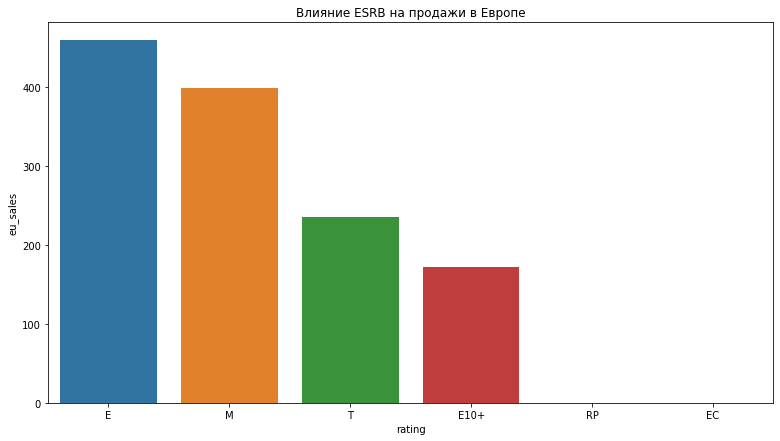

In [163]:
plt.figure(figsize=(13,7))
eu_esrb_top = eu_user_data.groupby('rating')['eu_sales'].sum()
eu_esrb_top = eu_esrb_top.reset_index(level='rating')
eu_esrb_top.sort_values(by='eu_sales',ascending=False,inplace=True)
sns.barplot(x='rating',y='eu_sales', data = eu_esrb_top).set_title('Влияние ESRB на продажи в Европе');
eu_esrb_top

,rating,jp_sales
0,E,120.10
5,T,83.84
3,M,43.79
1,E10+,36.27
2,EC,0.00
4,RP,0.00


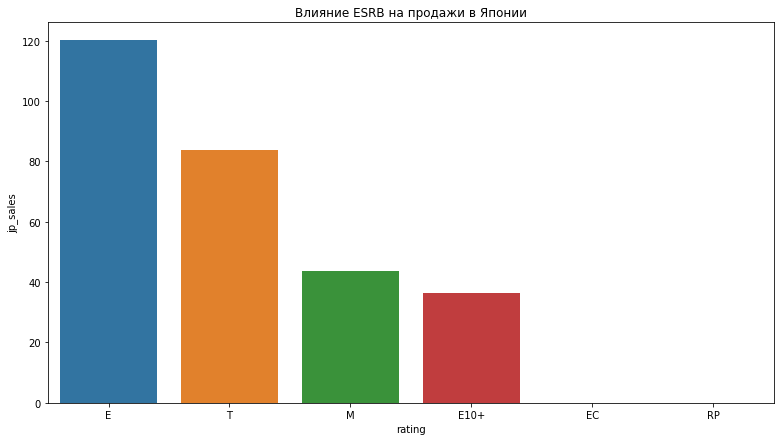

In [164]:
plt.figure(figsize=(13,7))
jp_esrb_top = jp_user_data.groupby('rating')['jp_sales'].sum()
jp_esrb_top = jp_esrb_top.reset_index(level='rating')
jp_esrb_top.sort_values(by='jp_sales',ascending=False,inplace=True)
sns.barplot(x='rating',y='jp_sales', data = jp_esrb_top).set_title('Влияние ESRB на продажи в Японии');
jp_esrb_top

Результаты по рейтингу в Северной Америке и Европе играют одинаковую роль, так наример рейтинг E ,который направлен на всех и охватывает саму широкую аудиторию, дальше идет M ,этим жанром интересуется пользователи по старше ,но ,скорей всего, большинство из пользователей за 17 лет в основном покупают игры именно данной категории,откуда такая популярность. T и E10+ имеют меньшую популярность так как находятся где-то по середине между категоризацией. EC очевидно мал , ибо дети сами не захотят купить игру , на которых нацеленно , а родители по-своему желанию вряд ли будут лишний раз их усыпать в играх ,откуда и минимальная популярность. В Японии все иначе , в плане рейтинга T и M ,так как ролевые игры в основном ретинга E или T , так как либо они пассивно красивые , либо бывают с долей крови итп

<h2>Вывод</h2>
<br>
Основной вывод который можно сделать это то , что пользователь в Европе по своим интересам очень схож с пользователем из Северной Америки , за исключением небольшой разницы, а в Японии совершенно другой рынок. 
<br>
<br>
В целом приставки нового поколения и там , и там весьма преспективные , на фоне своих старых братьев , так как и там , и там они были лидерами продаж , но в Америке больше любили PS3 ,в то время как в Европе X360 , но оба региона больше любят PS4 ,чем XOne , 3 DS и там , и там показывает неплохие результаты , на которые также можно положиться . Ситуация в Японии своершенно иная там любят очень продукцию Nintendo ,поэтому DS и 3DS в топе , и PS берут часть рынка , но не основную , однако Xbox там не имеет популярности
<br>
<br>
Жанры также что в Америке , что в Европе очень похожи , но с небольшой разницей , что в Америке Ролевые игры более популярны ,чем гонки , а в Европе наоборот. Также там и там очень популярны динамичные игры , а также стрелялки отсюда и популрнять рейтингов M и T ,которые включают в себя кровь и лексику , просто в разной мере. То есть эти регионы не ограничивают себя как-то фильтрами жестокости и по достижении возраста не ограничивают себя . В Японии  же ситуация другая , видимо у них культура более плохо настроена на насилие и поэтому самый популярный жанр ролевая игра , которая бывает в рейтингах Е и Т , так как там небольшие элементы крови и ничего более ,отсюда и популярность Е и Т , М видимо также немного популрян , на фоне суммы игр экшн , стрелялок и драк,которые имеют такие жанры

<h1>Шаг 5: Проверка гипотез</h1>

Гипотеза 1: Средние пользовательские рейтинги XOne и PC одинаковые
<br>
Для данной гипотезы нулевой будет H<sub>0</sub>: XOne['user_score'] == PC['user_score']
<br>
Альтернативной гипотезой будет H<sub>1</sub>: XOne['user_score'] != PC['user_score']
<br>
<br>
Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные
<br>
Для данной гипотезы нулевой будет H<sub>0</sub>: data['genre']=='Action' == data['genre']=='Sports
<br>
Альтернативной гипотезой будет H<sub>1</sub>: data['genre']=='Action' != data['genre']=='Sports
<br>
<br>
Нулевые гипотезы берем так ,чтобы они трактовали нам о том что их средние не различаются ,в то время как альтернативная гипотеза говорит об обратном
<br>
Пороговое значение alpha = 0.05 , является стандартным порогом для принятия/не принятия гипотезы 

In [189]:
#declaring alpha value
alpha = 0.05
#hypothesis 1
xone = games_upto_date[(games_upto_date['platform'] == 'XOne') & (~games_upto_date['user_score'].isna())]
pc = games_upto_date[(games_upto_date['platform'] == 'PC') & (~games_upto_date['user_score'].isna())]

In [190]:
#checkign hypothesis 1

ttest_result_1 = st.ttest_ind(xone['user_score'],pc['user_score'])

print('p-значение:',ttest_result_1.pvalue)

if (ttest_result_1.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.014354742043413306
Отвергаем нулевую гипотезу


In [192]:
#hypothesis 2
action = games_upto_date[(games_upto_date['genre'] == 'Action') & (~games_upto_date['user_score'].isna())]
sports = games_upto_date[(games_upto_date['genre'] == 'Sports') & (~games_upto_date['user_score'].isna())]

In [193]:
ttest_result_2 = st.ttest_ind(action['user_score'],sports['user_score'])

print('p-значение:',ttest_result_2.pvalue)

if (ttest_result_2.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.639545533657504e-12
Отвергаем нулевую гипотезу


Проверили обе гипотезы , и в обоих случаях отклонили Нулевую гипотезу , но в первом случае это опровергло нашу гипотезу ,означая ,что средние пользовательские рейтинги у ,скорей всего, PC и XOne разные. Во втором же случае наоборот подтвердили нашу гипотезу и сделали это достаточно уверенно ,то есть средние пользовательские рейтинги у Action и Sport разные !

<h1>Шаг 6: Общий вывод</h1>

Цель задачи была для интернет-магазина "Стримчик" провести анализ и выявить закономерности ,которые определяют успешность игры
<br>
<br>
<strong>Провели предобработку данных</strong> , по сути не так много там и сделали . Привели названия колонок в приемлимый вид, избавились от строк , которые нам никак не помогут при исследовании , и научились жить с остальными пропусками,ибо заполнения их - означает искажение данных. Привели столбцы к нужному виду ,избавились от дупликатов и теперь готовы идти уверенно в анализ данных !
<br>
<br>
    Провели большую работу по анализу данных, сначала мы ведилил <strong>актуальные периоды</strong> , которые предположили на основе продаж по годам с 2000 года ,также соотнесли с актуальностью по годам платформ и в итоге получили ссвой предполагаемый актуальный период по которому делали дальнейший анализ данных. Изучили интересную тендецию по времени жизни платформ , в среднем платформа живет 10 лет, и как правило ,если она была успешной , то на смену ей приходит новое поколение данной платформы . Есть исключение PC ,оно живет можно сказать в игровой индустрии "вечно" ,ибо оно не привязано к бренуд или к определенному "железу"и по этому не может также устаревать как они. 
<br>
Дальше анализировали продажи каждой <strong>консоли и выявляли самые актуальные</strong> из них. В итоге анализа выявили ,что самый большой потенциал на рынки Европы и Северной Америки есть у PS4 ,которая должна быть многообещающей. Также Там большой потенциал и у XOne , и чуть похуже у 3DS,но вполне неплохой, также не стоит забывать и их предшесвтенников PS3 и X360 ,которые до сих пор оказывают достаточное влияние на рынок связи с до сих пор достаточно объемным количеством пользователей.В Японии как мы выявили за весь анализ рынок достаточно сильно отличается и нужно понимать ,что одна и та же игра будет продаваться совершенно иначе там , например у них самые популярные платформы 3DS DS, также PS там пользуются какой-то популярностью ,но Xbox там совсем не котируется. <strong>Относительно жанров</strong> в Европе и Северной Америки также не видно сильной разницы , Action, Shooter, Sports, Misc  у обоих в топе по продажам , примерно с одинаковой долей рынка , но есть небольшая разница у них в 5 месте , у Америки это RPG , а у Европы Racing. В Японии все иначе , связано это ,скорей всего, с популярной платформой , там самыый популярный жанр это RPG ,который забирает там львиную долю рынка, также достаточно популярны Action, Misc , Sports, Platform . И жанры этих игр можно заметить также влияют на рейтинг игр ,и тем самым в Японии по сравнению с Европой и Америкой не приветсутвуется особо игры с более больше возрастным рейтингом и не так приветливы к жестокости итп.
<br>
Тем самым <strong>на основе данного анализа можем сделать вывод</strong> ,что для Европы и Северной Америке - Action, Shooter, Sports, Misc будут самыми успешными играми на платформах PS4 и XOne , а также их адаптация на PS3 и X360. Если же хотим взять игру более униврсальную для всех 3 регионов , то это будет RPG на 3DS или PS. Для Японии же в идеале проекты для 3DS  с жанром RPG, Action , Misc ,а также адаптацию под DS. Чтобы еще шире была аудитория ,то можно уделить внимание и рейтингу ,чтобы он был E ,так как каждй может играть в данное. Также заранее стоит взглянуть на рейтинг критиков ,что может сыграть роль к продажах игры, а если проект для Японии/ на 3DS ,то и на оценку пользователей ,но не слишком надеятся ,что сыграет какую-то колоссальную роль
<br>
<br>
Также выдвинули 2 гипотезы на проверку
<br>
<br>
Гипотеза 1: Средние пользовательские рейтинги XOne и PC одинаковые
<br>
Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные
<br>
<br>
В обоих случаях выплнили T-тест для сравнения средних 2ух не связанных совокупностей,где получили p значение , на основе которого получили данные для того ,чтобы отвергнуть H<sub>0</sub> гипотезу, и придерживаться H<sub>1</sub>,только в первом случае это опроовергло изначальную гипотезу , а во втором случае подтвердило,при том во втором случае уверенность была намного вероятней отклонить нулевую гипотезу и не получить результат случайно , в то время как в первом случае все же получили относительно малый процент , чуть меньше 1.5%